# Predicting HOuse Sale Prices
We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](https://doi.org/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
df=pd.read_csv("AmesHousing.tsv",delimiter='\t')

In [3]:
def transform_features(df):
    return df
def select_features(df):
    return df[["Gr Liv Area","SalePrice"]]
def train_and_test(df):
    train=df.iloc[:1460]
    test=df.iloc[1460:]
    
    numeric_train=train.select_dtypes(include=['integer','float'])
    numeric_test=test.select_dtypes(include=['integer','float'])
    
    features=numeric_train.columns.drop('SalePrice')
    lr=LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    predictions=lr.predict(test[features])
    mse=mean_squared_error(test['SalePrice'],predictions)
    rmse=np.sqrt(mse)
    
    return rmse

transform_df=transform_features(df)
filtered_df=select_features(df)
rmse=train_and_test(filtered_df)
rmse

57088.25161263909

## Feature Engineering


In [4]:
missing_val=df.isnull().sum()
missing_val

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [5]:
refined_cols=missing_val[missing_val>len(df)/20].sort_values()
refined_cols

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [6]:
df=df.drop(refined_cols.index,axis=1)

In [7]:
text_mv_counts=df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
drop_missing_cols=text_mv_counts[text_mv_counts>0]
df=df.drop(drop_missing_cols.index,axis=1)

In [8]:
num_missing=df.select_dtypes(include=['int','float']).isnull().sum()
fixable_numeric_cols=num_missing[num_missing>0].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [9]:
replacement_values=df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [10]:
df.fillna(replacement_values)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [11]:
years_sold=df['Yr Sold']-df['Year Built']
years_sold[years_sold<0]

2180   -1
dtype: int64

In [12]:
years_since_remod=df['Yr Sold']-df['Year Remod/Add']
years_since_remod[years_since_remod<0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [13]:
df['Years Before Sale']=years_sold
df['Years Since Remod']=years_since_remod

df.drop([2180,1702,2181],axis=0)
df.drop(['Year Built','Year Remod/Add'],axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,189900,13,12
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,195500,12,12
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,213500,9,9
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,...,144,0,0,1,2010,WD,Normal,191500,18,18
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,236500,15,14
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,189000,11,11


In [14]:
# Columns not useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [15]:
def transform_features(df):
    missing_vals=df.isnull().sum()
    drop_missing_cols=missing_vals[missing_vals>len(df)/20].sort_values()
    df=df.drop(drop_missing_cols.index,axis=1)
    text_cols=df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2=text_cols[text_cols>0]
    df=df.drop(drop_missing_cols_2.index,axis=1)
    num_missing=df.select_dtypes(include=['int','float']).isnull().sum()
    fixable_nums=num_missing[num_missing>0].sort_values()
    replacement_values=df[fixable_nums.index].mode().to_dict(orient='records')[0]
    df.fillna(replacement_values)
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df.drop(['Year Built','Year Remod/Add'],axis=1)
    df = df.drop(["PID", "Order"], axis=1)
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df

def select_features(df):
    return df[["Gr Liv Area","SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr =LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse    

df=pd.read_csv('AmesHousing.tsv',delimiter='\t')
transform_df=transform_features(df)
filtered_df=select_features(transform_df)
rmse=train_and_test(filtered_df)

rmse
    

55275.36731241307

## Feature Selection

In [16]:
numerical_df=transform_df.select_dtypes(include=['int','float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,189900,13,12


In [17]:
sorted_corrs=numerical_df.corr()['SalePrice'].abs().sort_values()
sorted_corrs

BsmtFin SF 2         0.006001
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035894
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182299
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276486
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439051
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.513121
Year Remod/Add       0.533007
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641690
Total Bsmt SF        0.643782
Garage Cars          0.648427
Gr Liv Area          0.717596
Overall Qu

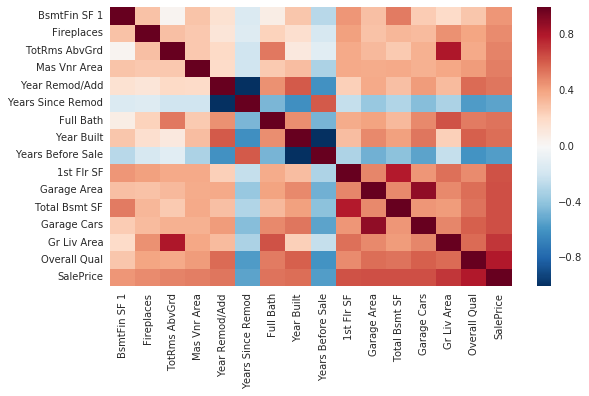

In [18]:
strong_corrs=sorted_corrs[sorted_corrs>0.4]
corrmat=numerical_df[strong_corrs.index].corr()
import seaborn as sns
plt.figure(figsize=(9,5))
sns.heatmap(corrmat)




In [19]:
strong_corrs

BsmtFin SF 1         0.439051
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.513121
Year Remod/Add       0.533007
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641690
Total Bsmt SF        0.643782
Garage Cars          0.648427
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [20]:
transform_df=transform_df.drop(sorted_corrs[sorted_corrs<0.4].index,axis=1)

In [21]:
# Categorial Columns
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

- Which columns are numerical but need to be encoded as categorial because numbers represent ordinal representation of data
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [22]:
transform_cat_cols=[]
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)
transform_cat_cols        
        

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [23]:
uniqueness_counts=transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
uniqueness_counts

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [24]:
cols_drop=uniqueness_counts[uniqueness_counts>10].index
transform_df=transform_df.drop(cols_drop,axis=1)

In [25]:
text_cols=transform_df.select_dtypes(include=['object'])
for col in text_cols.columns:
    transform_df[col]=transform_df[col].astype('category')

transform_df=pd.concat([transform_df,
                        pd.get_dummies(transform_df.select_dtypes(
                        include=['category']))],axis=1).drop(text_cols.columns,axis=1)    


In [29]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
     abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse    

IndentationError: unexpected indent (<ipython-input-29-398b9944bc12>, line 26)